In [7]:
import requests
import json
import pandas as pd

In [8]:
df_cartola = pd.read_excel(r'C:\Users\dylan\Documents\GitHub\Cartola\minimo_para_valorizar.xlsx')

In [9]:
pos = df_cartola.groupby('Pos')[['Pts']].mean().sort_values('Pts', ascending=False).head(5)
time = df_cartola.groupby('Time')[['Pts']].mean().sort_values('Pts', ascending=False).head(5)

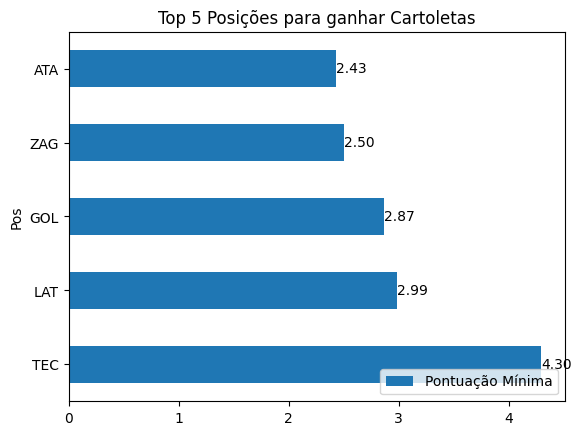

In [10]:
ax = pos.plot(kind='barh',title = 'Top 5 Posições para ganhar Cartoletas',legend = False)
for i, v in enumerate(pos['Pts']):
    ax.text(v, i, f'{v:.2f}', va='center')
ax.legend(['Pontuação Mínima'], loc='lower right')

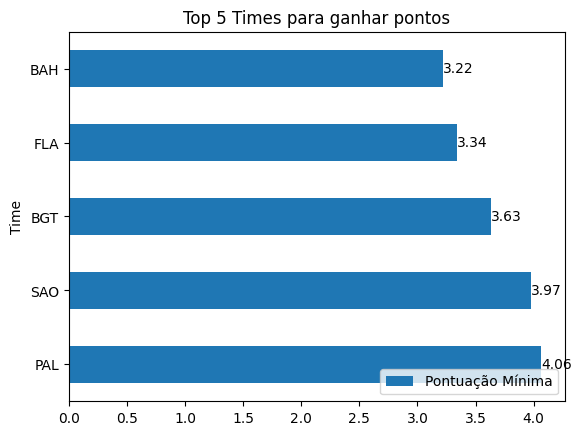

In [11]:
ax = time.plot(kind='barh',title = 'Top 5 Times para ganhar pontos',legend = False)
for i, v in enumerate(time['Pts']):
    ax.text(v, i, f'{v:.2f}', va='center')
ax.legend(['Pontuação Mínima'], loc='lower right')

In [12]:
df

NameError: name 'df' is not defined